#Complete EDA for a person’s creditworthiness

##I. Prerequisite

Please make sure you have the required dataset of applicant.csv and loan.csv

Note - The file I choose has been cleaned up and some of the columns has been converted to numeric data. Some are columns are merged together to get rid of missing values. 

Please make sure that you have python libraries imported/installed at your system

##II. Import libraries and set required parameters

In [ ]:
import pandas as pd
import io
import numpy as np
import seaborn as sns
import bokeh.io
import bokeh.plotting
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.3f' % x)
bokeh.io.output_notebook()

##III. Uploading the Data and Merging

###1. Uploading and Reading the data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving applicant.csv to applicant.csv
Saving loan.csv to loan.csv


In [ ]:
df_applicant = pd.read_csv(io.BytesIO(uploaded['applicant.csv']))
df_loan = pd.read_csv(io.BytesIO(uploaded['loan.csv']))

In [ ]:
df_applicant.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Foreign_worker,Savings_account_balance,Has_Registered_Telephone,Balance_in_existing_bank_account,Has_been_employed_in_years
0,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1,Low,0,0 - 200000,1 - 4
1,1231297,22,female,divorced/separated/married,1,own,1,skilled employee / official,1,Low,1,0 - 200000,1 - 4
2,1428429,48,male,single,1,own,4,skilled employee / official,1,Low,1,none,1 - 4
3,1508823,34,male,single,1,own,2,skilled employee / official,1,Low,0,0 - 200000,1 - 4
4,1764281,27,male,single,1,own,2,skilled employee / official,1,Low,0,0,1 - 4


In [ ]:
df_loan.head()

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d9cc2-edad-11ea-95a3-19eea692401f,1715169,12,electronic equipment,3059000,2,real estate,0,0,none,1,existing loans paid back duly till now,0
1,d68d9dda-edad-11ea-8f66-070acf87953f,1719964,12,new vehicle,1295000,3,car or other,0,0,none,1,existing loans paid back duly till now,1
2,d68d9ef2-edad-11ea-9320-44cc6aafa0f2,1231297,12,electronic equipment,1567000,1,car or other,0,0,none,1,existing loans paid back duly till now,0
3,d68dae74-edad-11ea-9dc4-548e2abf51a3,1188917,12,electronic equipment,1158000,3,car or other,0,0,none,1,existing loans paid back duly till now,0
4,d68db2c0-edad-11ea-b4e4-05b1f0a92868,1193227,12,electronic equipment,2073000,4,real estate,1,0,none,1,existing loans paid back duly till now,0


In [ ]:
df_loan.columns, df_loan.shape, df_applicant.columns, df_applicant.shape

(Index(['loan_application_id', 'applicant_id', 'Months_loan_taken_for',
        'Purpose', 'Principal_loan_amount',
        'EMI_rate_in_percentage_of_disposable_income', 'Property',
        'Has_coapplicant', 'Has_guarantor', 'Other_EMI_plans',
        'Number_of_existing_loans_at_this_bank', 'Loan_history',
        'high_risk_applicant'],
       dtype='object'),
 (1000, 13),
 Index(['applicant_id', 'Primary_applicant_age_in_years', 'Gender',
        'Marital_status', 'Number_of_dependents', 'Housing',
        'Years_at_current_residence', 'Employment_status', 'Foreign_worker',
        'Savings_account_balance', 'Has_Registered_Telephone',
        'Balance_in_existing_bank_account', 'Has_been_employed_in_years'],
       dtype='object'),
 (1000, 13))

###2. Merging the Data

In [ ]:
df_applicant.applicant_id.duplicated().any(), df_loan.applicant_id.duplicated().any()

(False, False)

In [ ]:
#Since we have applicant ID as a foreing key in both the table and there are no repeating value, we can merge the dataframne by applicant_id
df = pd.merge(df_loan, df_applicant, on = 'applicant_id', how = 'inner')
df

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,...,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Foreign_worker,Savings_account_balance,Has_Registered_Telephone,Balance_in_existing_bank_account,Has_been_employed_in_years
0,d68d9cc2-edad-11ea-95a3-19eea692401f,1715169,12,electronic equipment,3059000,2,real estate,0,0,none,...,divorced/separated,1,own,4,unskilled - resident,1,Very high,0,none,4 - 7
1,d68d9dda-edad-11ea-8f66-070acf87953f,1719964,12,new vehicle,1295000,3,car or other,0,0,none,...,divorced/separated/married,1,rent,1,skilled employee / official,1,Low,0,0 - 200000,0 - 1
2,d68d9ef2-edad-11ea-9320-44cc6aafa0f2,1231297,12,electronic equipment,1567000,1,car or other,0,0,none,...,divorced/separated/married,1,own,1,skilled employee / official,1,Low,1,0 - 200000,1 - 4
3,d68dae74-edad-11ea-9dc4-548e2abf51a3,1188917,12,electronic equipment,1158000,3,car or other,0,0,none,...,divorced/separated,1,own,1,skilled employee / official,1,High,1,0 - 200000,1 - 4
4,d68db2c0-edad-11ea-b4e4-05b1f0a92868,1193227,12,electronic equipment,2073000,4,real estate,1,0,none,...,divorced/separated/married,1,own,2,skilled employee / official,1,Medium,0,none,1 - 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,d68f88ac-edad-11ea-8009-3bbb2ccad29c,1262341,36,used vehicle,8947000,3,car or other,0,0,stores,...,single,2,own,2,management / self-employed / highly qualified ...,1,no-status,1,none,4 - 7
996,d68f98ec-edad-11ea-afa5-18ba290c113c,1461746,48,used vehicle,10297000,4,no-property,0,0,stores,...,single,2,for free,4,skilled employee / official,1,Low,1,0,4 - 7
997,d68f9cfc-edad-11ea-9a60-389d29e8d844,1379089,30,electronic equipment,1919000,4,no-property,0,0,stores,...,single,1,own,3,management / self-employed / highly qualified ...,1,Medium,0,0 - 200000,0 - 1
998,d68fa094-edad-11ea-9e78-4a34ece526c2,1903505,24,FF&E,929000,4,car or other,0,0,stores,...,single,1,own,2,skilled employee / official,1,no-status,1,none,4 - 7


In [ ]:
#Missing Data
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
missingData = pd.concat([total, percent], axis=1, keys=['Total', 'Percent %'])
missingData

,Total,Percent %
loan_application_id,0,0.000
Primary_applicant_age_in_years,0,0.000
Balance_in_existing_bank_account,0,0.000
Has_Registered_Telephone,0,0.000
Savings_account_balance,0,0.000
Foreign_worker,0,0.000
Employment_status,0,0.000
Years_at_current_residence,0,0.000
Housing,0,0.000
Number_of_dependents,0,0.000


##IV. Analysing the Data

####Question 1 - 

Do the Exploratory Data Analysis & share the insights.

###Bivariante Analysis

In [ ]:
df.high_risk_applicant.value_counts()

0    700
1    300
Name: high_risk_applicant, dtype: int64

####Figure 1 - Purpose wise risk count

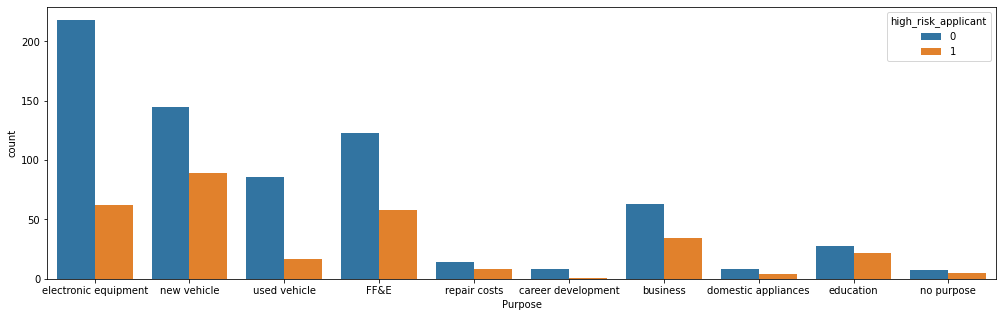

In [ ]:
fig,axes = plt.subplots(1,1 ,figsize=(17,5))
sns.countplot(x='Purpose',data=df,hue='high_risk_applicant')

####Figure 2 - Risk when property owned

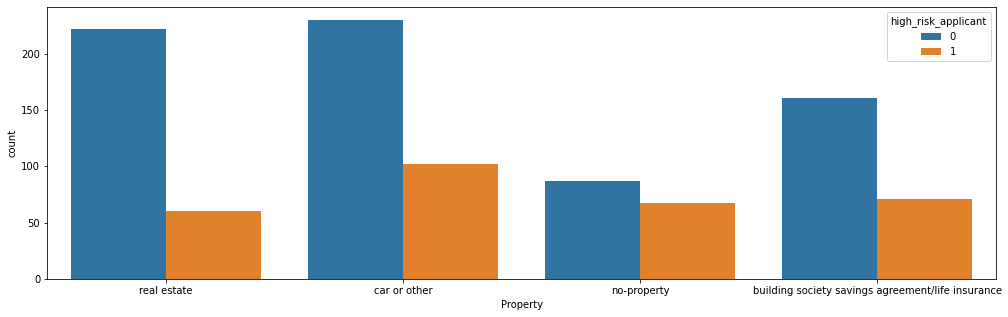

In [ ]:
fig,axes = plt.subplots(1,1 ,figsize=(17,5))
sns.countplot(x='Property',data=df,hue='high_risk_applicant')

####Figure 3 - Risk with other EMI Plan

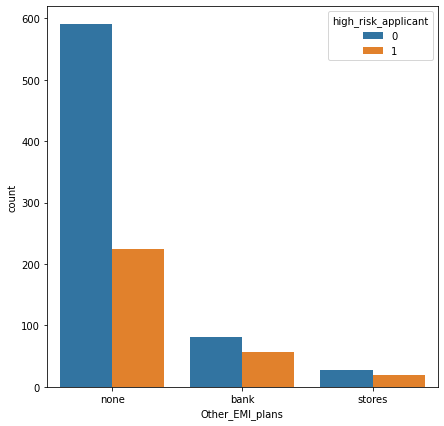

In [ ]:
fig,axes = plt.subplots(1,1 ,figsize=(7,7))
sns.countplot(x='Other_EMI_plans',data=df,hue='high_risk_applicant')

####Figure 4 - Genderwise Risk

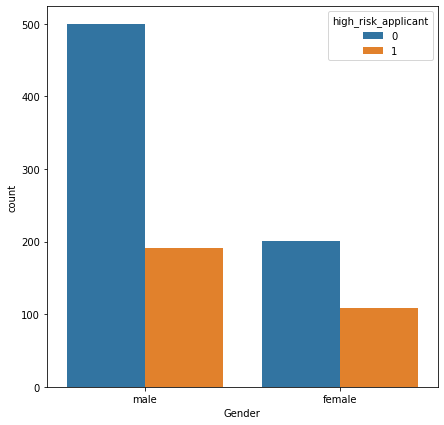

In [ ]:
fig,axes = plt.subplots(1,1 ,figsize=(7,7))
sns.countplot(x='Gender',data=df,hue='high_risk_applicant')

####Figure 5 - Risk by previous loan

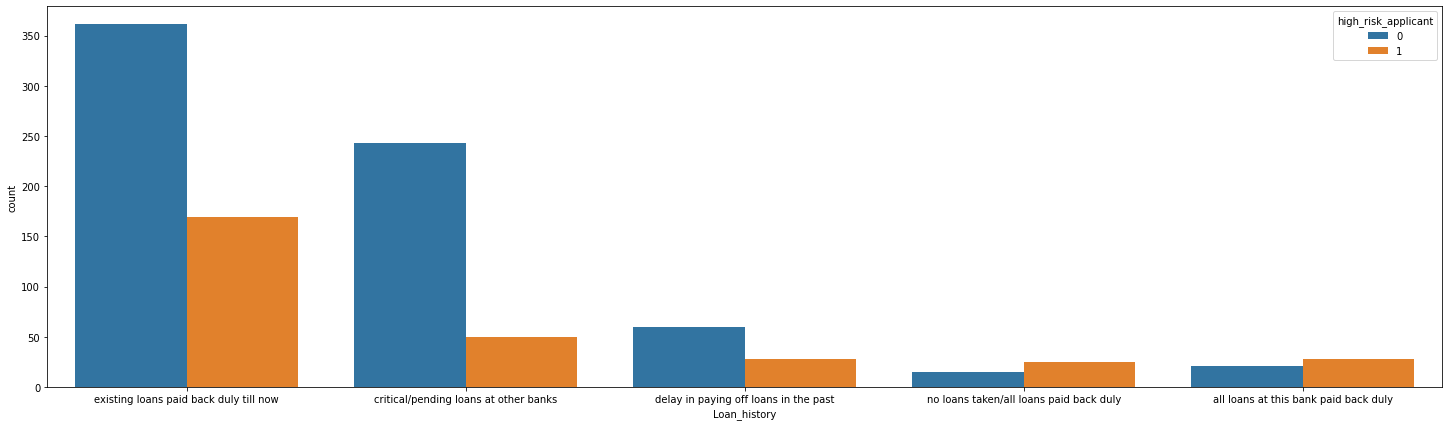

In [ ]:
fig,axes = plt.subplots(1,1 ,figsize=(25,7))
sns.countplot(x='Loan_history',data=df,hue='high_risk_applicant')

####Insights so far...

1.   Highest amount of loan was given for electronic equipment followed by new vehicle and FF&E.

2.   New vehicle, FF&E, Repair Cost, education are the most risky loan with above 50% of changes of default.

3.   Person owing no property has the highest risk of default of above 80% followed by person having life insurance.

4.   People having no EMI plans are less riskier than people having other EMI plans.

5.   Almost 80% of people with other EMI plans default.

6.   Gender plays very important role as female applicants are riskier with over 50% of default rate.

7.   People who settled their previous loan or having pending loans are less riskier than other. 

####Figure 6 - Risk by Housing

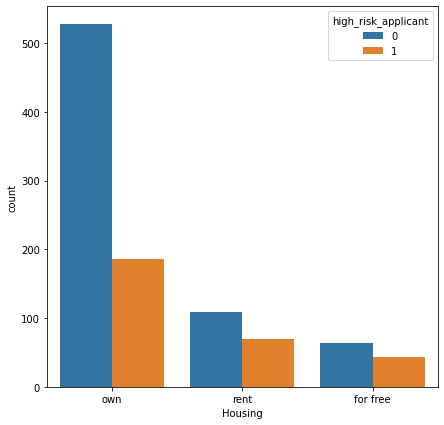

In [ ]:
fig,axes = plt.subplots(1,1 ,figsize=(7,7))
sns.countplot(x='Housing',data=df,hue='high_risk_applicant')

####Figure 7 - Risk by No. of years employed range

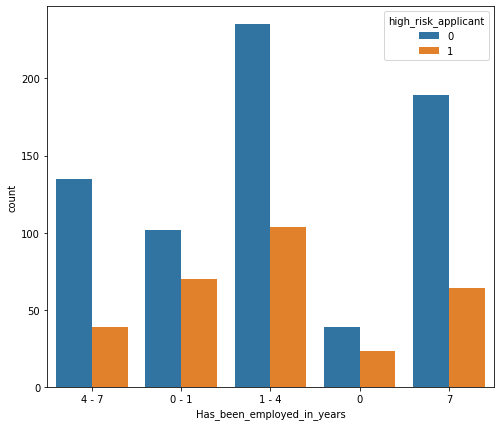

In [ ]:
fig,axes = plt.subplots(1,1 ,figsize=(8,7))
sns.countplot(x='Has_been_employed_in_years',data=df,hue='high_risk_applicant')

####Figure 8 - Risk by Marital Status

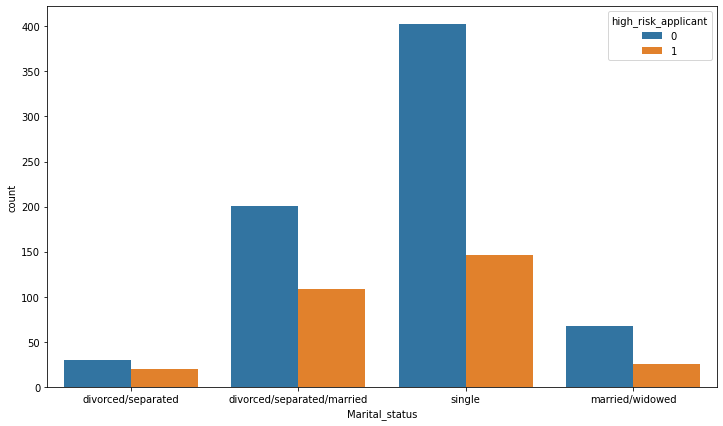

In [ ]:
fig,axes = plt.subplots(1,1 ,figsize=(12,7))
sns.countplot(x='Marital_status',data=df,hue='high_risk_applicant')

####Figure 9 - Risk by Registered Telephone number

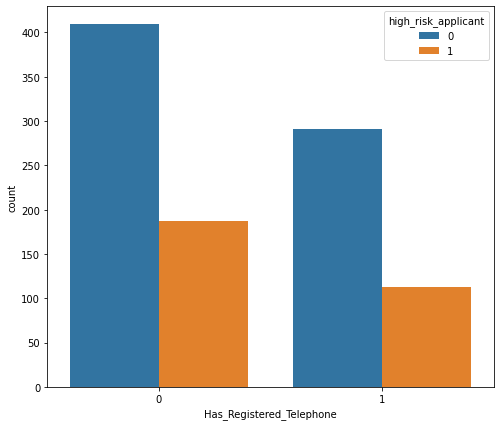

In [ ]:
fig,axes = plt.subplots(1,1 ,figsize=(8,7))
sns.countplot(x='Has_Registered_Telephone',data=df,hue='high_risk_applicant')

####Figure 10 - Risk by Saving account Balance

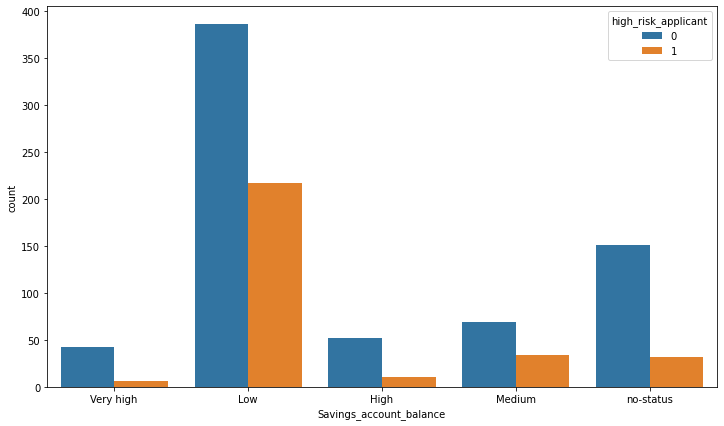

In [ ]:
fig,axes = plt.subplots(1,1 ,figsize=(12,7))
sns.countplot(x='Savings_account_balance',data=df,hue='high_risk_applicant')

####Insights so far...

1.   Applicant with their own house has less credit risk

2.   Applicant with more work experience tends be less riskier.

3.   80% of candidates risk when they get a new job.

4.   Applicant with second marriage are more riskier than single and married / widowed people.

5.   The higher is the saving account balance, the lower is the credit risk

6.   The lower the saving account balance, the higher is the credit risk

####Figure 11 - Risk by Balance range

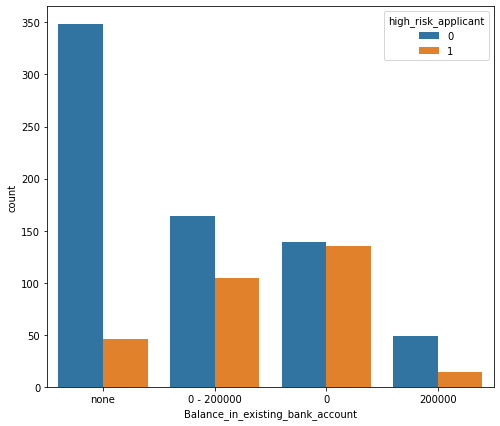

In [ ]:
fig,axes = plt.subplots(1,1 ,figsize=(8,7))
sns.countplot(x='Balance_in_existing_bank_account',data=df,hue='high_risk_applicant')

####Figure 12 - Risk by type of employement

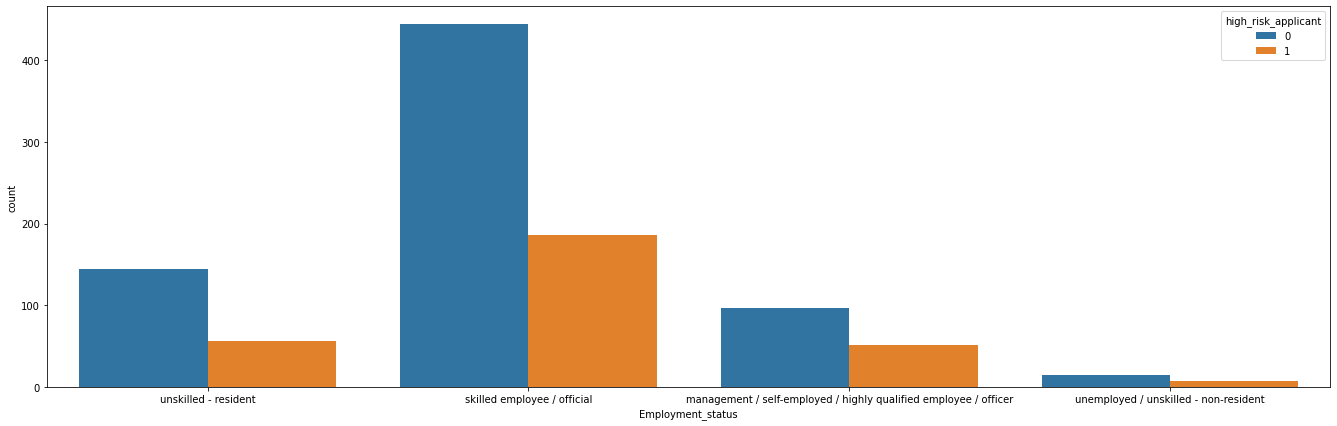

In [ ]:
fig,axes = plt.subplots(1,1 ,figsize=(23,7))
sns.countplot(x='Employment_status',data=df,hue='high_risk_applicant')

####Figure 13 - Risk by Area of work

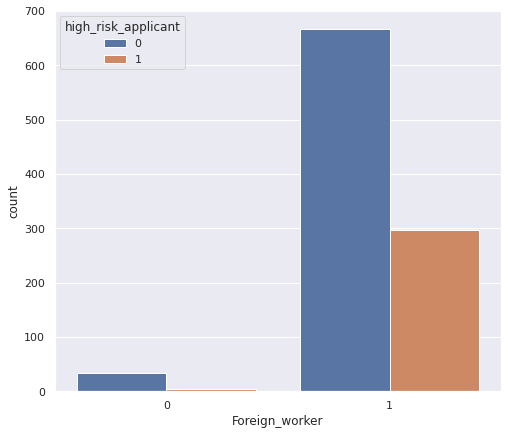

In [ ]:
fig,axes = plt.subplots(1,1 ,figsize=(8,7))
sns.countplot(x='Foreign_worker',data=df,hue='high_risk_applicant')

####Figure 14 -  Risk in presence of guarantor

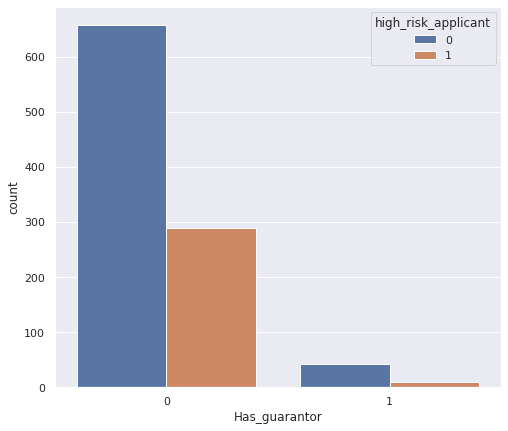

In [ ]:
fig,axes = plt.subplots(1,1 ,figsize=(8,7))
sns.countplot(x='Has_guarantor',data=df,hue='high_risk_applicant')

####Figure 15 - Risk in presence of coapplicatant

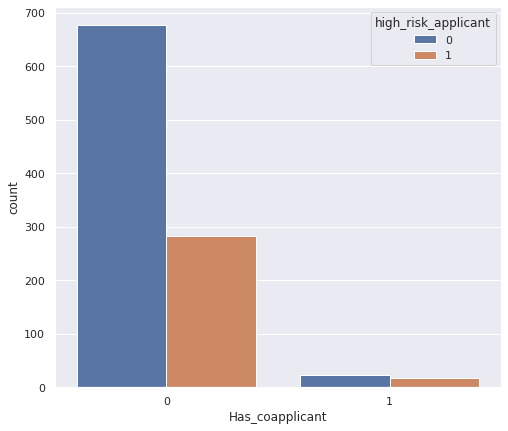

In [ ]:
fig,axes = plt.subplots(1,1 ,figsize=(8,7))
sns.countplot(x='Has_coapplicant',data=df,hue='high_risk_applicant')

####Figure 16 - Risk by current residence duration

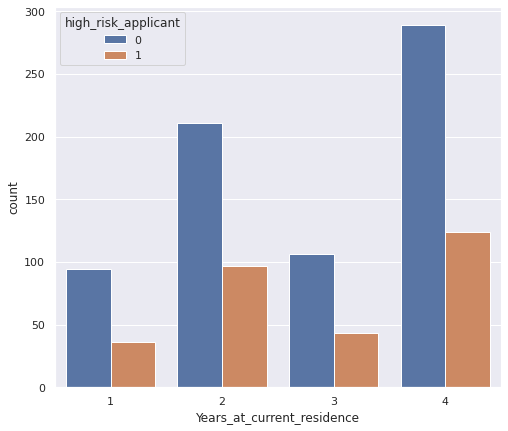

In [ ]:
fig,axes = plt.subplots(1,1 ,figsize=(8,7))
sns.countplot(x='Years_at_current_residence',data=df,hue='high_risk_applicant')

####Figure 17 - Risk by No. of dependents

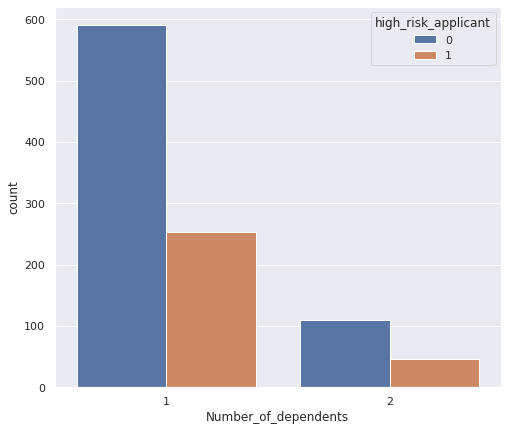

In [ ]:
fig,axes = plt.subplots(1,1 ,figsize=(8,7))
sns.countplot(x='Number_of_dependents',data=df,hue='high_risk_applicant')

####Figure 13 - Comparing Numerical Columns

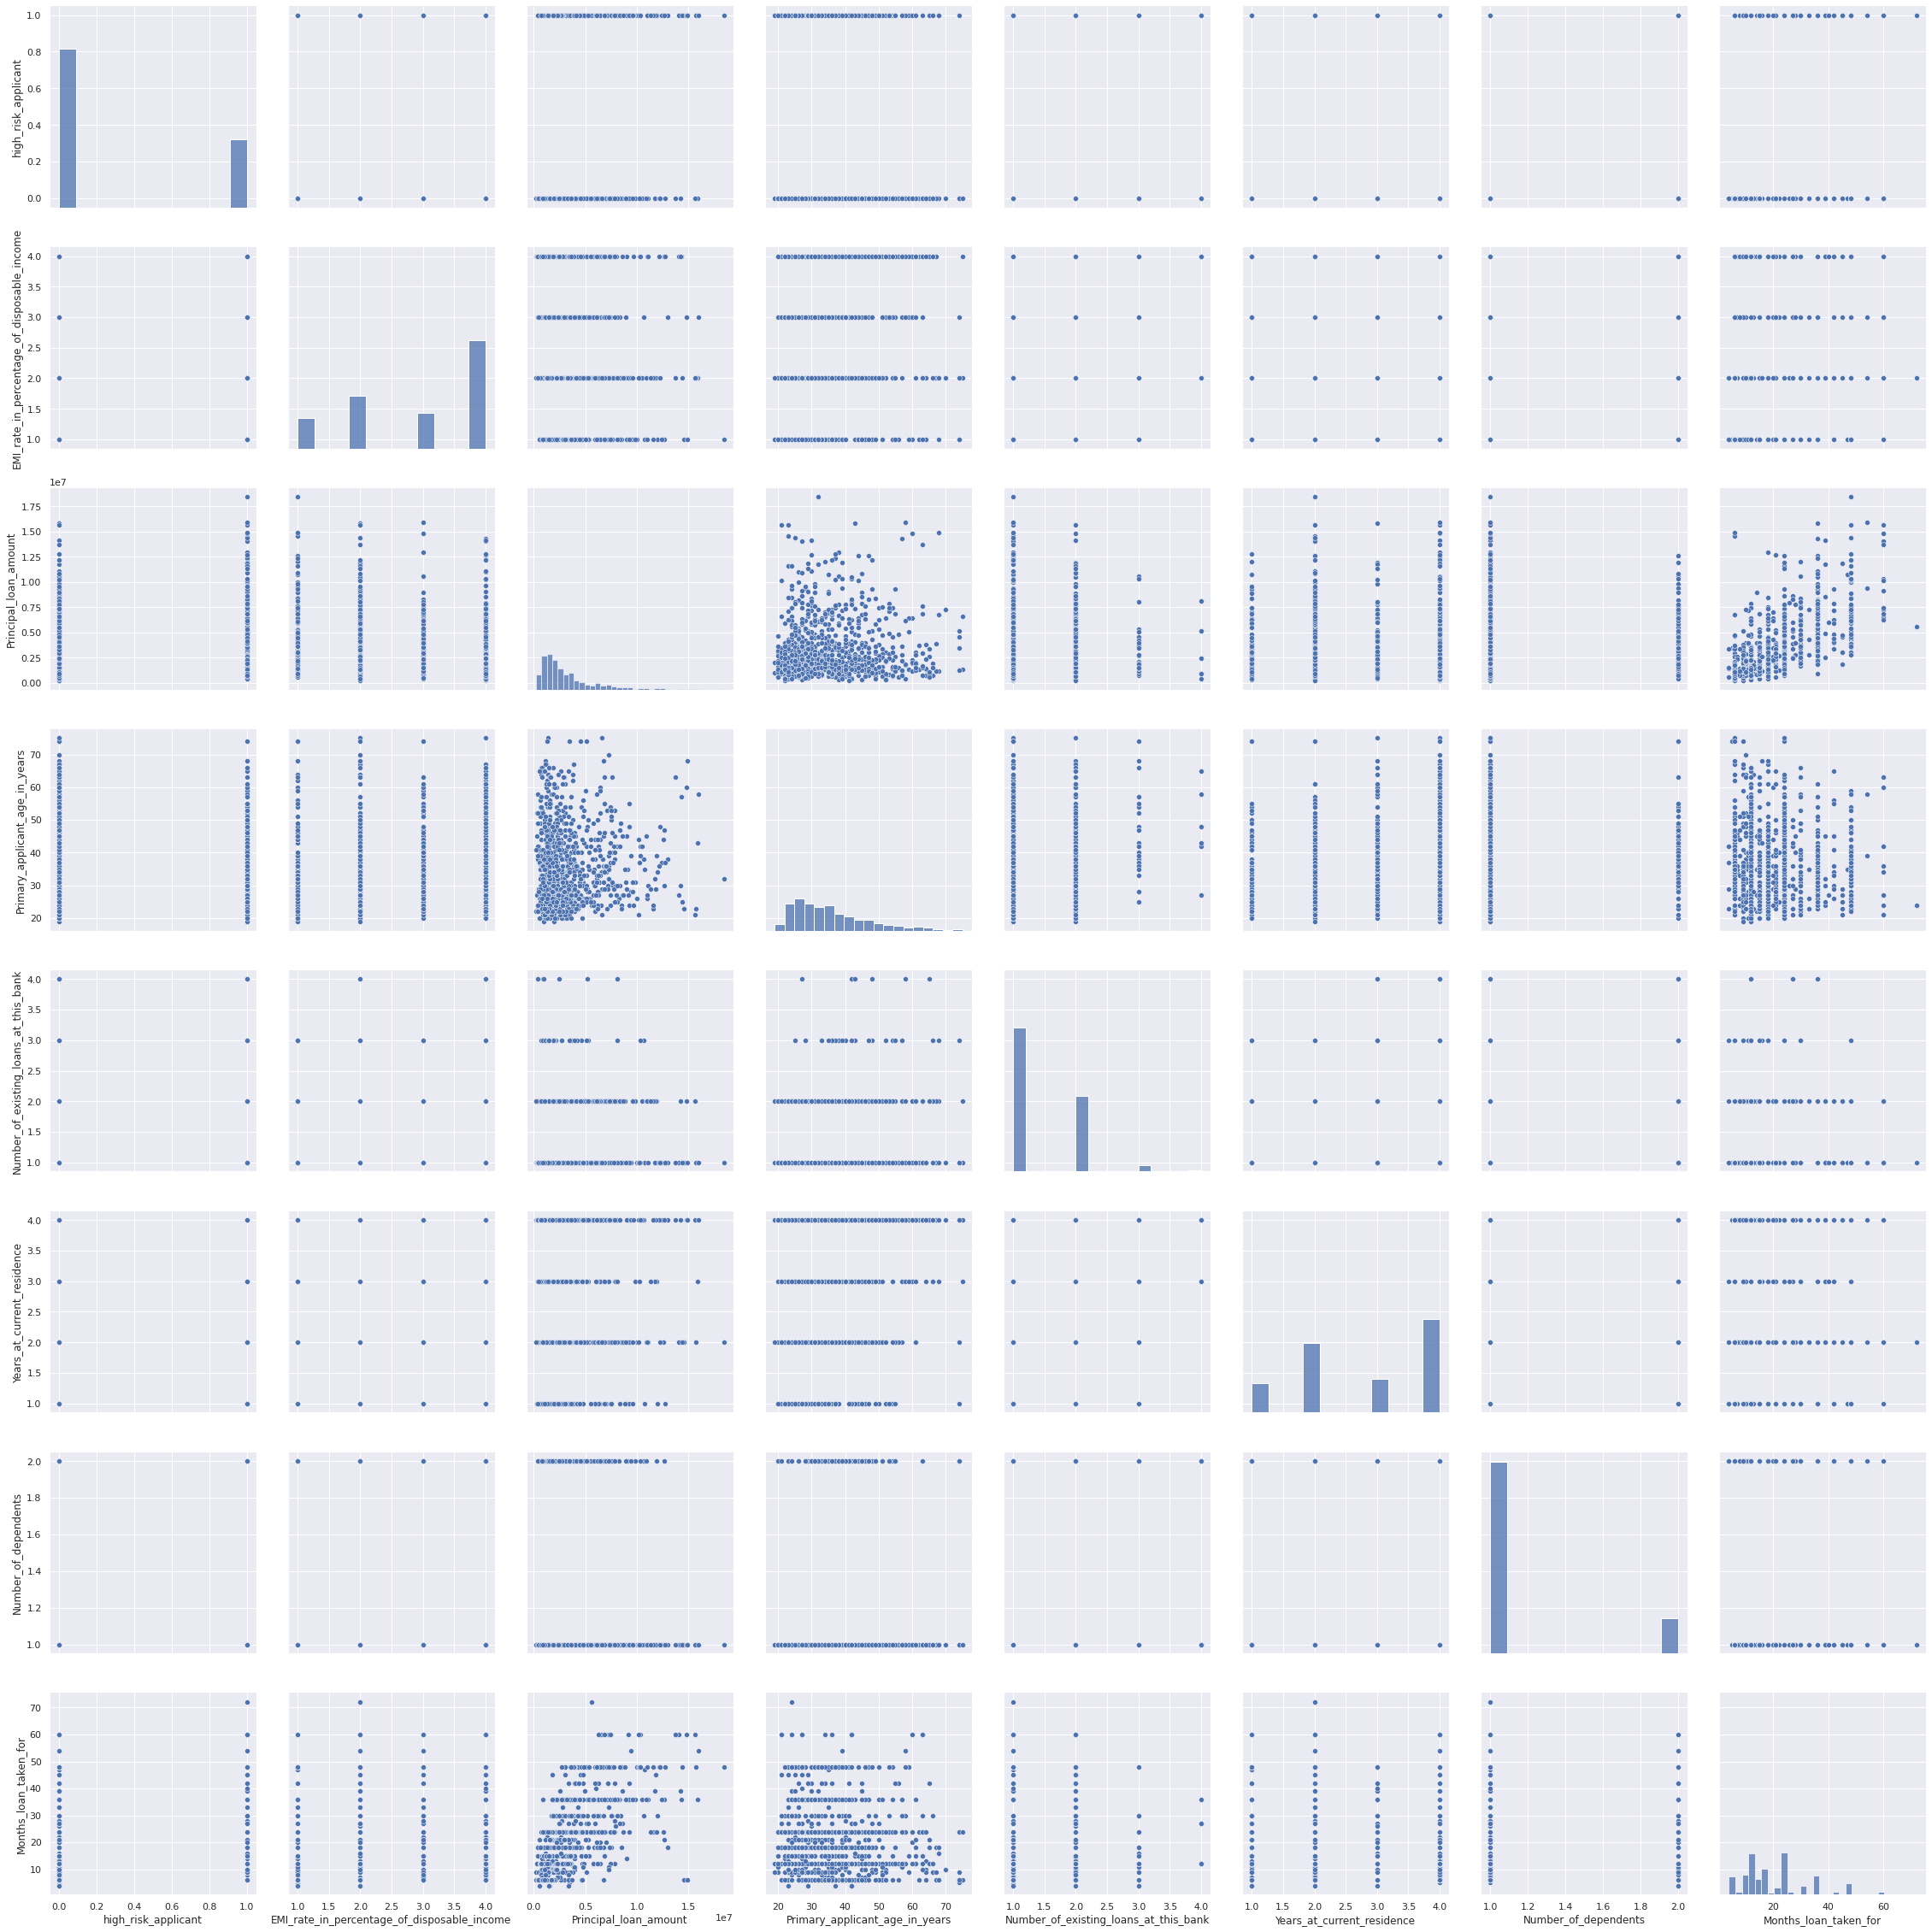

In [ ]:
sns.set()
columns = ['high_risk_applicant','EMI_rate_in_percentage_of_disposable_income','Principal_loan_amount', 'Primary_applicant_age_in_years','Number_of_existing_loans_at_this_bank', 'Years_at_current_residence',
'Number_of_dependents','Months_loan_taken_for']
sns.pairplot(df[columns], size = 4)
plt.show();